## BEEM061 - Technical assignment

# PART B



## 1. Explore the Bitcoin Blockchain and Basic web coding

## 1.1: Extract Information From Your Own Transaction

In [1]:
# Fetch Block Data Using WhatsOnChain API
import requests
import datetime

# Block height from the transaction
block_height = 866234

# API URL to fetch block details
api_url = f"https://api.whatsonchain.com/v1/bsv/main/block/height/{block_height}"

# Fetch block data
response = requests.get(api_url)

if response.status_code == 200:
    block_data = response.json()
    
    # Extract required information
    tx_count = block_data.get("txcount", "N/A")
    block_time = block_data.get("time", "N/A")
    total_fees = block_data.get("totalFees", "N/A")
    confirmations = block_data.get("confirmations", "N/A")
    miner = block_data.get("miner", "N/A")
    
    # Convert Unix timestamp to human-readable format
    readable_time = datetime.datetime.fromtimestamp(block_time).strftime('%Y-%m-%d %H:%M:%S') if block_time != "N/A" else "N/A"
    
    # Print data
    print("Block Data (JSON):")
    print(block_data)
    print("\nExtracted Information:")
    print(f"Transaction Count: {tx_count}")
    print(f"Time: {readable_time} (Human-readable)")
    print(f"Total Fees: {total_fees}")
    print(f"Confirmations: {confirmations}")
    print(f"Miner: {miner}")
else:
    print(f"Failed to fetch block data. Status code: {response.status_code}")

Block Data (JSON):
{'hash': '00000000000000000aebb32793cb81c9449d109c9d3783590d13d31b2e465703', 'confirmations': 13139, 'size': 958735, 'height': 866234, 'version': 771751936, 'versionHex': '2e000000', 'merkleroot': '4728d569f8251f6135ff5603d16bc5be8ecead6d9dadc46817343a970061b540', 'txcount': 1794, 'nTx': 0, 'num_tx': 1794, 'tx': ['409802088faaa67e8a504ece2458e93d77179b9a443e76d5576f21cb54e4f9ec', '485e26bea603ee6d0b8f80526ece16467d1c6fff4d8720821a81473671b1a90e', '28a6e3a575a1fc373eb77ed48d85da904a61668cc0071871be677cb27692a066', 'f33764d6dbd128b999c43a9534db1acdf12c2fe597227594fc7c3f972fdd65c2', 'c0a217046d693d55e3c82980b171df9762fe86651e40a94607d3fcff60187256', '2ae7e5dd8552fe38ad222646e42d1ed1c5232b36e838624b167a9ec8ed5484ed', 'b82b87d9b74e05faf7e6c7e507eada95b2d8256aa714736f9c63d063557a4713', '77767951bc2cf02b886706a75f9ebcf5b1172f3219318d518aebfc43eebc69c1', '55b6fdb5df18e133f7c91f8632f965034cc4e176ca32186fbddf313bfb58d383', 'ce5eb635a7f95185e8f2503ea973e6368fa70071f33fbefac08f9

## 1.2: Basic Web Coding

In [5]:
# Section 1: Setup and Install Dependencies
# Install required libraries
!pip install bitcoinlib qrcode[pil] requests

In [6]:
# Section 2: Generate Keys and Bitcoin Address
# Import required library for key generation
from bitcoinlib.keys import Key

# Generate a random Bitcoin private key, public key, and address
key = Key()
private_key = key.private_hex  # Hexadecimal private key
public_key = key.public_hex    # Hexadecimal public key
address = key.address          # Bitcoin address

# Display the generated keys and address
print(f"Private Key: {private_key}")
print(f"Public Key: {public_key}")
print(f"Bitcoin Address: {address}")


Private Key: 043097fbdac5b28f5ec05280696324832aada68aacafd3035c66fb9f497ed54e
Public Key: 0396a7743afc8d102ae3bfaf5d5145f1d099d6fd6f5bfc1c799d08cf858821365e
Bitcoin Address: <bound method Key.address of <Key(public_hex=0396a7743afc8d102ae3bfaf5d5145f1d099d6fd6f5bfc1c799d08cf858821365e, network=bitcoin)>>


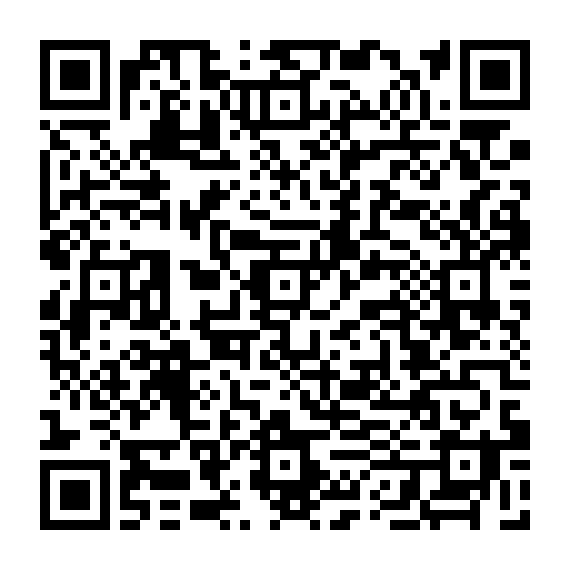

In [7]:
# Section 3: Generate a QR Code for the Address
# Import the library for QR code generation
import qrcode
from IPython.display import display

# Generate a QR code for the Bitcoin address
qr = qrcode.QRCode()
qr.add_data(address)  # Add the Bitcoin address to the QR code
qr.make(fit=True)

# Create and display the QR code image
qr_img = qr.make_image(fill_color="black", back_color="white")
display(qr_img)


In [8]:
# Section 4: Fetch Live Bitcoin Price
# Import library for making HTTP requests
import requests

# Function to fetch the current Bitcoin price
def fetch_btc_price():
    try:
        response = requests.get("https://api.coindesk.com/v1/bpi/currentprice/BTC.json")
        if response.status_code == 200:
            data = response.json()
            price = data["bpi"]["USD"]["rate"]
            print(f"Live Bitcoin Price: 1 BTC = ${price}")
        else:
            print("Failed to fetch Bitcoin price.")
    except Exception as e:
        print(f"Error: {e}")

# Fetch and display the Bitcoin price
fetch_btc_price()


Live Bitcoin Price: 1 BTC = $95,610.928


In [9]:
# Section 5: Save the Address and QR Code to Files
# Save the Bitcoin address to a text file
qr_img = qr.make_image(fill_color="black", back_color="white")
qr_img.save("bitcoin_qrcode.png")  # Save as an image file

print("Bitcoin address and QR code have been saved.")

Bitcoin address and QR code have been saved.


## 2. Time Series Investigation of Bitcoin Prices

## 2.1. Obtain Time Series Data

In [10]:
# Required Libraries
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import statsmodels.api as sm


# 2.1. Obtain Time Series Data
# Step 1: Fetch Cryptocurrency Price (Bitcoin) using Yahoo Finance
def fetch_crypto_price_yf():
    try:
        bitcoin_data = yf.download("BTC-USD", start="2000-01-01", end="2024-01-01")
        bitcoin_data = bitcoin_data[['Close']]
        bitcoin_data.rename(columns={"Close": "Bitcoin Price (USD)"}, inplace=True)
        return bitcoin_data
    except Exception as e:
        print(f"Error fetching Bitcoin data from Yahoo Finance: {e}")
        return pd.DataFrame()

# Fetch Bitcoin data
bitcoin_data = fetch_crypto_price_yf()

# Step 2: Fetch Safe Asset Price (e.g., Gold)
gold_data = yf.download("GC=F", start="2000-01-01", end="2024-01-01")
gold_data = gold_data[['Close']]
gold_data.rename(columns={"Close": "Gold Price (USD)"}, inplace=True)

# Step 3: Fetch Market Index (S&P 500)
sp500_data = yf.download("^GSPC", start="2000-01-01", end="2024-01-01")
sp500_data = sp500_data[['Close']]
sp500_data.rename(columns={"Close": "S&P 500 Index"}, inplace=True)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


## 2.2 Data Transformations

C:\Users\D.Varshini\AppData\Local\Temp\ipykernel_32184\88976573.py:9: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  combined_data.fillna(method='ffill', inplace=True)  # Forward-fill missing values


Combined Data (First 5 rows):
Price      Bitcoin Price (USD) Gold Price (USD) S&P 500 Index
Ticker                 BTC-USD             GC=F         ^GSPC
Date                                                         
2014-09-17          457.334015      1234.400024   2001.569946
2014-09-18          424.440002      1225.699951   2011.359985
2014-09-19          394.795990      1215.300049   2010.400024
2014-09-20          408.903992      1215.300049   2010.400024
2014-09-21          398.821014      1215.300049   2010.400024
Log Returns (First 5 rows):
Price      Bitcoin Price (USD) Gold Price (USD) S&P 500 Index
Ticker                 BTC-USD             GC=F         ^GSPC
Date                                                         
2014-09-18           -0.074643        -0.007073      0.004879
2014-09-19           -0.072402        -0.008521     -0.000477
2014-09-20            0.035111         0.000000      0.000000
2014-09-21           -0.024968         0.000000      0.000000
2014-09-22  

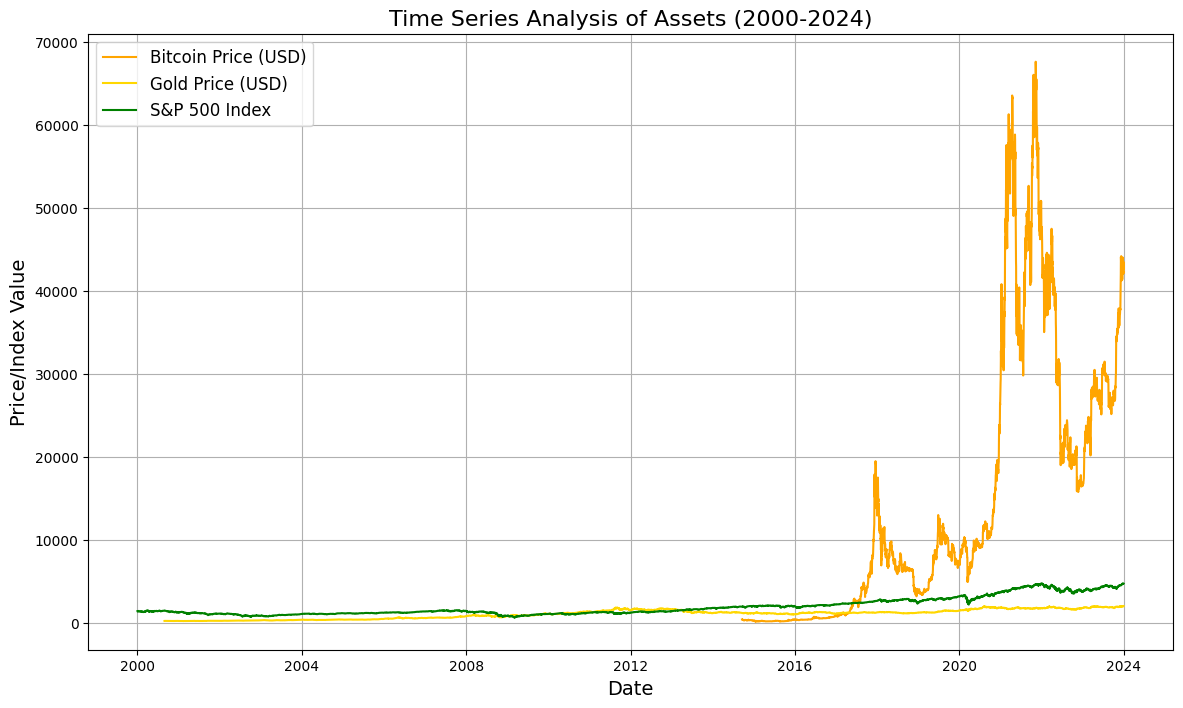

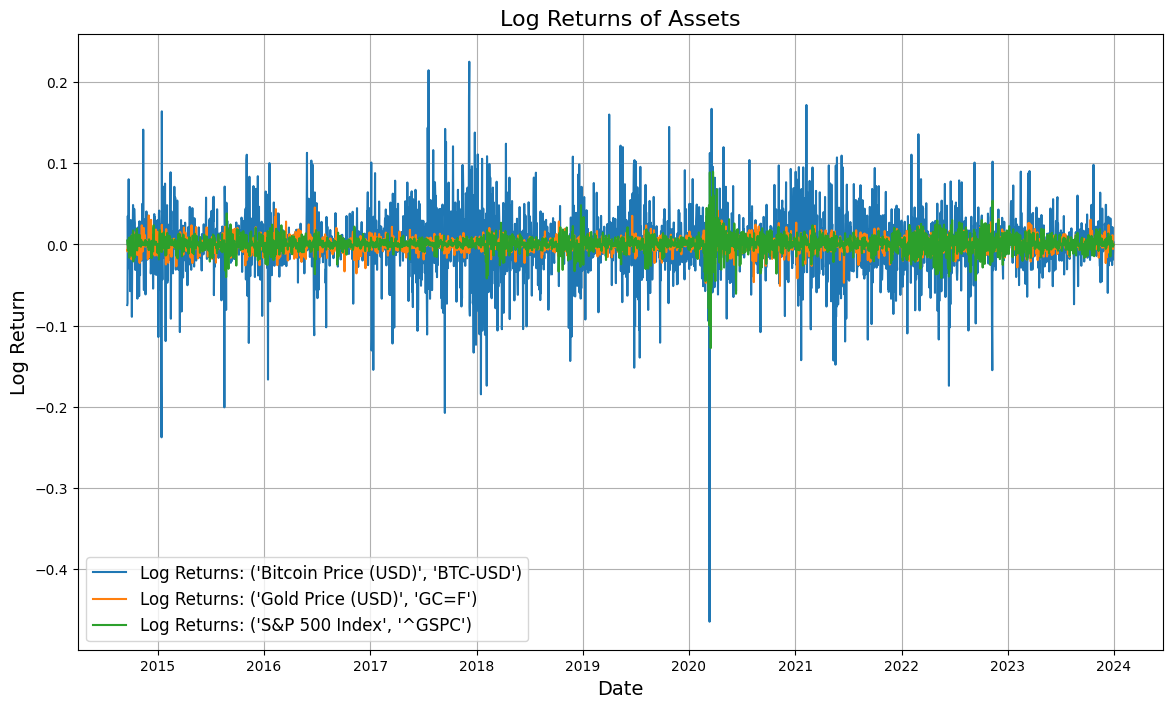

In [11]:
# Step 4: Combine Data for Analysis
combined_data = pd.concat([
    bitcoin_data.resample('D').mean() if not bitcoin_data.empty else pd.DataFrame(),
    gold_data.resample('D').mean(),
    sp500_data.resample('D').mean()
], axis=1)

# Handle missing data
combined_data.fillna(method='ffill', inplace=True)  # Forward-fill missing values
combined_data.dropna(inplace=True)  # Drop rows with any remaining NaN values

# Debug: Check combined data
print("Combined Data (First 5 rows):")
print(combined_data.head())

# Step 5: Transform Observations into Returns
def calculate_log_returns(data):
    log_returns = np.log(data / data.shift(1))
    return log_returns

log_returns = combined_data.apply(calculate_log_returns)
log_returns.dropna(inplace=True)

# Debug: Check log returns
print("Log Returns (First 5 rows):")
print(log_returns.head())

# Step 6: Calculate Correlations
def calculate_correlations():
    correlations = log_returns.corr()
    print("Correlation Matrix:")
    print(correlations)
    return correlations

correlation_matrix = calculate_correlations()

# Step 7: Calculate Volatility (Standard Deviation)
def calculate_volatility():
    volatility = log_returns.std() * 100
    print("\nVolatility (Standard Deviation of Log Returns, %):")
    print(volatility)
    return volatility

volatility = calculate_volatility()

# Step 8: Plot Data
def plot_time_series():
    plt.figure(figsize=(14, 8))

    # Plot each series if data is available
    if not bitcoin_data.empty:
        plt.plot(bitcoin_data.index, bitcoin_data['Bitcoin Price (USD)'], label="Bitcoin Price (USD)", color='orange')
    plt.plot(gold_data.index, gold_data['Gold Price (USD)'], label="Gold Price (USD)", color='gold')
    plt.plot(sp500_data.index, sp500_data['S&P 500 Index'], label="S&P 500 Index", color='green')

    # Customize plot
    plt.title("Time Series Analysis of Assets (2000-2024)", fontsize=16)
    plt.xlabel("Date", fontsize=14)
    plt.ylabel("Price/Index Value", fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True)

    plt.show()

plot_time_series()

# Step 9: Plot Log Returns
def plot_log_returns():
    plt.figure(figsize=(14, 8))

    for column in log_returns.columns:
        plt.plot(log_returns.index, log_returns[column], label=f"Log Returns: {column}")

    plt.title("Log Returns of Assets", fontsize=16)
    plt.xlabel("Date", fontsize=14)
    plt.ylabel("Log Return", fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True)

    plt.show()

plot_log_returns()

## 2.3 Data analysis

In [12]:
# Step 10: CAPM Analysis - Estimate Alpha and Beta for Bitcoin
def capm_analysis():
    # Define variables for regression
    missing_columns = []
    if 'Bitcoin Price (USD)' not in log_returns:
        missing_columns.append('Bitcoin Price (USD)')
    if 'S&P 500 Index' not in log_returns:
        missing_columns.append('S&P 500 Index')

    if missing_columns:
        print(f"Insufficient data for CAPM analysis. Missing columns: {missing_columns}")
        return

    y = log_returns['Bitcoin Price (USD)']
    x = log_returns['S&P 500 Index']
    x = sm.add_constant(x)  # Add constant for intercept

    # Run OLS regression
    model = sm.OLS(y, x, missing='drop').fit()
    
    print("\nCAPM Regression Results for Bitcoin:")
    print(model.summary())
    return model

capm_model = capm_analysis()

# Debugging lengths of datasets
print(f"Bitcoin data length: {len(bitcoin_data)}")
print(f"Gold data length: {len(gold_data)}")
print(f"S&P 500 data length: {len(sp500_data)}")


CAPM Regression Results for Bitcoin:
                            OLS Regression Results                            
Dep. Variable:                BTC-USD   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     139.7
Date:                Sun, 12 Jan 2025   Prob (F-statistic):           1.27e-31
Time:                        22:05:24   Log-Likelihood:                 6413.9
No. Observations:                3392   AIC:                        -1.282e+04
Df Residuals:                    3390   BIC:                        -1.281e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         

## Interpretation of the results

### CAPM Analysis Results: Interpretation

1. **Alpha (α)**:  
   - If **α = 0**, Bitcoin's returns align with market expectations.  
   - **α > 0** indicates Bitcoin generates excess returns (outperforms).  
   - **α < 0** suggests underperformance.

2. **Beta (β)**:  
   - **β > 1**: Bitcoin is more volatile than the market, amplifying its movements.  
   - **β ≈ 0**: Bitcoin behaves independently of the market, ideal for diversification.

3. **R-squared (R²)**:  
   - Low R² indicates Bitcoin’s returns are driven by unique factors, not the market.

4. **Significance**:  
   - Statistically significant **α** and **β** (p < 0.05) confirm these relationships are meaningful.

**Summary**:  
CAPM quantifies Bitcoin's high risk and potential for excess returns but shows it behaves largely independently of the market.


## 3 Machine Learning in Practice

## 3.1 High Level Description of FinTech Firm

## Sarunas' FinTech Firm Overview

Sarunas’ FinTech firm is a data-driven organization that leverages machine learning to streamline and optimize financial services. The firm operates through four key structural components, each contributing to a cohesive and efficient system. These components are designed to ensure the firm is operating at peak performance and able to make data-informed decisions.


## Key Structural Components

### Data Aggregation
This component collects data from multiple sources, such as customer transactions, credit histories, and financial market trends. The goal is to ensure comprehensive, accurate, and real-time data availability, which serves as the foundation for all subsequent operations.

### Feature Engineering and Preprocessing
Once data is collected, it undergoes cleaning, processing, and transformation. Feature engineering is the process of identifying and selecting relevant attributes (e.g., income level, spending habits) that will enhance the predictive accuracy of machine learning models. This step is crucial to ensure that the inputs to the model are optimized for meaningful analysis.

### Machine Learning Modeling
At the core of the firm’s operations is the application of **Logistic Regression**, a classification technique that predicts binary outcomes (e.g., loan approval or denial). Logistic Regression analyzes the relationships between input features and the likelihood of a specific outcome, outputting probabilities. Its simplicity, interpretability, and effectiveness make it ideal for financial decision-making tasks.

### Decision Deployment
The outputs of the machine learning model are integrated into the firm’s decision-making processes. For example, predictions can automate credit approvals, personalize customer offers, or refine risk assessment strategies. This component ensures that the insights derived from machine learning are actionable and beneficial to the firm.


## Logistic Regression: A Key Machine Learning Technique

### What is Logistic Regression?
Logistic Regression is a statistical method used to predict the probability of an event occurring. It uses the **sigmoid function** to convert a linear combination of input features into probabilities ranging between 0 and 1. This makes it particularly suitable for classification tasks, such as determining whether a loan application should be approved.

### Why is Logistic Regression Useful?
- **Interpretability**: The outputs (coefficients) are easy to understand and explain.
- **Efficiency**: Logistic Regression requires relatively low computational power compared to more complex models.
- **Flexibility**: It handles both binary and multi-class classification problems effectively.


## Comparison of Logistic Regression with Other Techniques

### Logistic Regression vs. Ordinary Least Squares (OLS)
- **Purpose**: OLS is designed for regression tasks that predict continuous outcomes, while Logistic Regression is used for classification tasks with discrete outcomes.
- **Model Output**: OLS provides a continuous predicted value, whereas Logistic Regression provides a probability that can be converted into classes (e.g., 0 or 1).
- **Performance**: Logistic Regression is preferred when the response variable is categorical (e.g., approve/reject), whereas OLS is better for predicting numerical outcomes.

### Logistic Regression vs. Generative AI (GenAI) Techniques
- **Nature of the Models**: Logistic Regression is a discriminative model focused on classification, while GenAI (e.g., GPT models) generates new data (text, images, etc.) by learning patterns in existing data.
- **Complexity**: Logistic Regression is relatively simple and interpretable, whereas GenAI models are more complex, requiring deep learning architectures and significant computational resources.
- **Similarity**: Both techniques rely on optimization algorithms (e.g., gradient descent) to minimize loss functions and improve predictions.


## Overall Interaction and Achievement

The four structural parts of Sarunas’ FinTech firm interact seamlessly to form a robust system:

- **Data aggregation** feeds clean and relevant data into the machine learning pipeline.
- **Feature engineering** transforms this data into actionable insights.
- **Logistic Regression** uses these insights to make predictions.
- **Decision deployment** ensures that these predictions enhance the firm’s operational efficiency, customer satisfaction, and overall performance.

By combining these elements, Sarunas' FinTech firm is able to leverage data effectively, making smarter decisions and improving overall outcomes.


## Conclusion

In summary, Sarunas' FinTech firm utilizes data science and machine learning techniques, particularly **Logistic Regression**, to optimize financial services. Through a well-organized process of data aggregation, feature engineering, modeling, and deployment, the firm ensures that predictions are actionable and valuable, leading to improved decision-making and business performance.


## 3. 2  Written Description of Python Code

In [2]:
import pandas as pd

In [3]:
import pickle

In [4]:
from sklearn.model_selection import train_test_split

#### This imports the train_test_split function from the sklearn library. It is used to split the dataset into training and testing sets, helping ensure that the model can be evaluated on unseen data.

In [5]:
from sklearn.preprocessing import MinMaxScaler

In [6]:
from sklearn.linear_model import LogisticRegression

#### This imports the LogisticRegression model from sklearn. It’s a classification model used to predict binary outcomes, which is the goal in this scenario: predicting whether a loan will be fully paid or charged off.

In [25]:
from sklearn.pipeline import Pipeline

#### This imports the Pipeline class from sklearn. A pipeline helps chain together multiple steps in a machine learning workflow, such as scaling and model training, into a single object.

In [30]:
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
import numpy as np

## Data Taken From: 
## https://www.kaggle.com/wordsforthewise/lending-club </br>
## Model is From:
## https://www.kaggle.com/benesalvatore/predict-default-using-logisitic-regression

In [7]:
features = ['loan_amnt', 'annual_inc', 'term', 'emp_length']

In [8]:
a = pd.read_csv('accepted_2007_to_2018Q4.csv.gz', usecols=features+['loan_status'])

In [9]:
 full_set = a.query("loan_status in ('Fully Paid', 'Charged Off')").copy()

In [10]:
full_set = full_set.dropna(subset=['emp_length'])

# Build the model - Logistic Regression
## 1. Transform our Label *loan_status* and other columns

In [11]:
full_set['loan_status'] = full_set['loan_status'].replace(
    {
        'Fully Paid': 1,
        'Charged Off': 0
    }
)

C:\Users\D.Varshini\AppData\Local\Temp\ipykernel_25884\3109672900.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  full_set['loan_status'] = full_set['loan_status'].replace(


#### This line replaces the categorical loan_status values ("Fully Paid" and "Charged Off") with numeric values (1 and 0, respectively). This transformation is necessary for logistic regression, which requires numeric labels.

In [12]:
full_set['term'] = full_set['term'].replace(
    {
        ' 36 months': 36,
        ' 60 months': 60
    }
)

C:\Users\D.Varshini\AppData\Local\Temp\ipykernel_25884\3173423118.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  full_set['term'] = full_set['term'].replace(


#### This line replaces the term column values from string representations of loan terms (' 36 months' and ' 60 months') to integer values (36 and 60). This enables the logistic regression model to interpret the data as numerical features.

In [13]:
full_set['emp_length'] = full_set['emp_length'].map(lambda x: x.split(' ')[0])

In [14]:
full_set['emp_length'] = full_set['emp_length'].map(lambda x: str(x).replace('+', '').replace('<', '0'))


#### This line further processes the emp_length values by removing any '+' signs and replacing '<' with '0'. This ensures that employment length is represented as a valid number or zero for unknown values.

## Build Model ##

In [15]:
model_features = list(full_set.columns)
model_features.remove('loan_status')

In [16]:
full_set.head()

,loan_amnt,term,emp_length,annual_inc,loan_status
0,3600.0,36,10,55000.0,1
1,24700.0,36,10,65000.0,1
2,20000.0,60,10,63000.0,1
4,10400.0,60,3,104433.0,1
5,11950.0,36,4,34000.0,1


In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    full_set[model_features],
    full_set['loan_status'],
    random_state=42
)

#### This line splits the dataset into training and test sets. X_train and X_test are the features (inputs), and y_train and y_test are the target labels (loan status). The random_state=42 ensures reproducibility.

In [22]:
model = LogisticRegression()
scaler = MinMaxScaler()

In [26]:
pipeline = Pipeline([('scaler', scaler), ('model', model)])

In [27]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()), ('model', LogisticRegression())])

#### This line trains the model using the pipeline on the training data (X_train and y_train). The pipeline includes both feature scaling and model training steps.

## Test Model ##

In [28]:
test_probas = pipeline.predict_proba(X_test)[:,1]

#### This line generates the predicted probabilities for the test set (X_test). The [:, 1] selects the probabilities for the positive class (i.e., the "Fully Paid" class, represented by 1).

In [31]:
fpr, tpr, tresholds = roc_curve(y_test, test_probas)

#### This line computes the False Positive Rate (FPR), True Positive Rate (TPR), and decision thresholds for the ROC curve. These values are used to evaluate the model's performance at different thresholds.

ROC-AUC-score:  0.6342068796098207


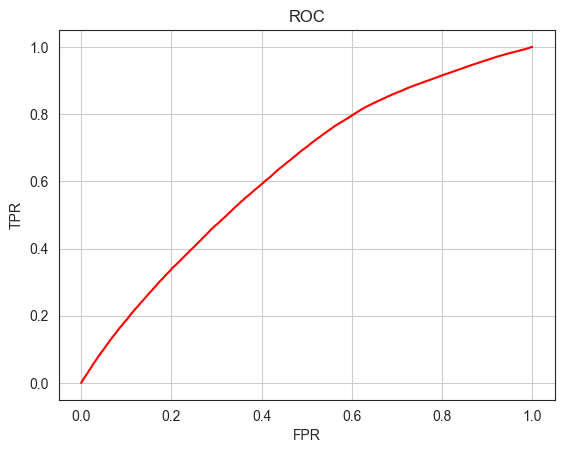

In [32]:
plt.plot(fpr, tpr, color='red')

plt.title('ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.grid()

print('ROC-AUC-score: ', roc_auc_score(y_test, test_probas))

In [33]:
def _compute_accuracy_for_thresholds(data: pd.core.frame.DataFrame):
    """
    Compute Classifier's Accuracy for various thresholds
    """
    
    thresholds = np.linspace(0, 1, 100)
    
    accuracies = []
    
    for threshold in thresholds:
        preds = data['preds'].map(lambda x: 1 if x > threshold else 0)
        accuracy_ = accuracy_score(data['labels'].values, preds)
        accuracies.append(accuracy_)
    
    return accuracies, thresholds

In [34]:
X_test['preds'] = test_probas
X_test['labels'] = y_test

In [42]:
accuracies, thresholds = _compute_accuracy_for_thresholds(X_test)

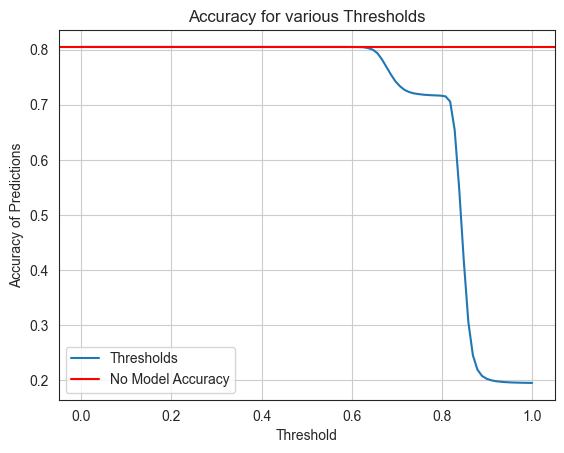

In [45]:
plt.plot(thresholds.reshape(-1, 1), accuracies, label='Thresholds')
plt.axhline(
    (X_test['labels'].sum()) / len(X_test), color='red', label='No Model Accuracy')
plt.grid()
plt.title('Accuracy for various Thresholds')
plt.xlabel('Threshold')
plt.ylabel('Accuracy of Predictions')
plt.legend()
plt.show()

In [46]:
accuracy_score(X_test['labels'].values, list(map(lambda x: 1 if x > 0.7 else 0, X_test['preds'])))

0.7393148089674771

## Save Pipeline ##

In [47]:
import os

# Create the directory if it does not exist
if not os.path.exists('app'):
    os.makedirs('app')


In [48]:
with open('app/model.pkl', 'wb') as f:
    pickle.dump(pipeline, f)

In [49]:
model = pickle.load(
    open('app/model.pkl', 'rb')
)

## 3. 3  Build your own Machine Learning Model


## Data Taken From: 
## https://www.kaggle.com/datasets/shebrahimi/financial-distress

In [50]:
pip install pandas scikit-learn matplotlib seaborn


Note: you may need to restart the kernel to use updated packages.


In [96]:
# load the libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')

In [80]:
# Load the dataset (replace with the actual path to your dataset)
data = pd.read_csv('Financial Distress.csv.zip')  # Ensure the dataset is loaded properly
print(data.head())

   Company  Time  Financial Distress      x1        x2       x3       x4  \
0        1     1            0.010636  1.2810  0.022934  0.87454  1.21640   
1        1     2           -0.455970  1.2700  0.006454  0.82067  1.00490   
2        1     3           -0.325390  1.0529 -0.059379  0.92242  0.72926   
3        1     4           -0.566570  1.1131 -0.015229  0.85888  0.80974   
4        2     1            1.357300  1.0623  0.107020  0.81460  0.83593   

         x5        x6       x7  ...      x74    x75     x76     x77   x78  \
0  0.060940  0.188270  0.52510  ...   85.437  27.07  26.102  16.000  16.0   
1 -0.014080  0.181040  0.62288  ...  107.090  31.31  30.194  17.000  16.0   
2  0.020476  0.044865  0.43292  ...  120.870  36.07  35.273  17.000  15.0   
3  0.076037  0.091033  0.67546  ...   54.806  39.80  38.377  17.167  16.0   
4  0.199960  0.047800  0.74200  ...   85.437  27.07  26.102  16.000  16.0   

   x79  x80       x81  x82  x83  
0  0.2   22  0.060390   30   49  
1  0.4   22 

In [82]:
# Data preprocessing
# Handle missing values (if any) and encode categorical variables
data = data.dropna()  # Example: drop rows with missing values

# Encode the target variable (assuming 'bankrupt' is the target column)
data['target'] = data['Financial Distress'].apply(lambda x: 1 if x == 'Yes' else 0)

# Define features and target variable
X = data.drop(['target', 'Financial Distress'], axis=1)  # Drop the target and any non-features
y = data['target']

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [83]:
# feature scaling
# Standardizing the features (important for algorithms sensitive to feature scales)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [84]:
# Model Creation and Training
# Create the Random Forest model
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train_scaled, y_train)


RandomForestClassifier(random_state=42)

Predicted probabilities shape: (735, 1)
Accuracy: 1.0


C:\Users\D.Varshini\OneDrive\Documents\Zoom\OneDrive\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\D.Varshini\OneDrive\Documents\Zoom\OneDrive\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\D.Varshini\OneDrive\Documents\Zoom\OneDrive\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       735
           1       0.00      0.00      0.00         0

   micro avg       1.00      1.00      1.00       735
   macro avg       0.50      0.50      0.50       735
weighted avg       1.00      1.00      1.00       735



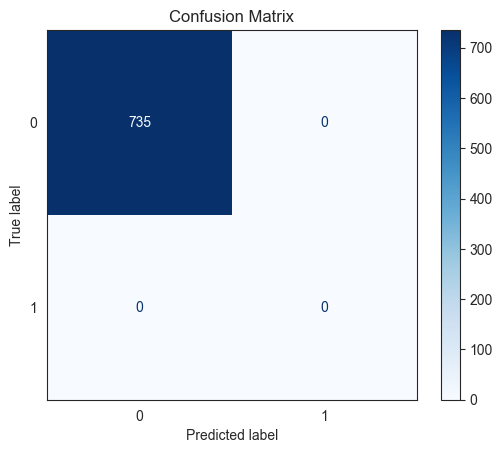

In [100]:
# model evaluation
from sklearn.metrics import (
    accuracy_score, classification_report, roc_auc_score, roc_curve,
    confusion_matrix, ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt
import numpy as np

# Predict and evaluate the model
y_pred = model.predict(X_test_scaled)
proba = model.predict_proba(X_test_scaled)
print("Predicted probabilities shape:", proba.shape)

# Handle binary classification probabilities
if proba.shape[1] == 2:  # Binary classification
    proba_positive = proba[:, 1]
else:
    proba_positive = proba[:, 0]  # Default to class 0 probabilities if single-column output

# Evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))

# Explicitly provide labels in the classification report
print("Classification Report:\n", classification_report(y_test, y_pred, labels=[0, 1]))

# Handle single-class cases for metrics like ROC-AUC
unique_labels = np.unique(y_test)
if len(unique_labels) < 2:
    print(f"Warning: y_test contains only one label: {unique_labels}. Skipping ROC-AUC and ROC curve.")

    # Provide confusion matrix for the single class
    cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
    ConfusionMatrixDisplay(cm, display_labels=[0, 1]).plot(cmap="Blues")
    plt.title("Confusion Matrix")
    plt.show()
else:
    # Calculate ROC-AUC Score
    roc_auc = roc_auc_score(y_test, proba_positive)
    print("ROC-AUC Score:", roc_auc)

    # Plot ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test, proba_positive)
    plt.figure()
    plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], linestyle="--", color="red", label="Random Guess")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()
    plt.grid(True)
    plt.show()


In [101]:

# Save the trained model
with open('financial_distress_model.pkl', 'wb') as f:
    pickle.dump(model, f)
